# The Battle of Neighborhoods

### London District WC1R

The aim of this project is to explore possibilities to open a business in London. 
In the first part, I look at the different venue categories and their location. I have showed what venues are least commons, as well as what is the population average income. The average income information could further serve as an indicator of the areas' living standards.

<br/> The analysis is based on data about London districts via a combination of two datasets: 
<br/> 1) doogal.co.uk - dataset with London postcodes with district and average income details. 
<br/> 2) Foresquare - explore venues around the WC1R London district - analysis limited to Central West London due to the very large number of postcodes in Greater London


#### Import Libraries

In [355]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

### Download and prepare data about London West End, District WC1R

#### Scrape the List of postal codes and coordinates of WC1R from Doogal and create a DataFrame

In [356]:
# Read csv file with data
df_all_Lnd=pd.read_csv('https://www.doogal.co.uk/UKPostcodesCSV.ashx?region=E12000007')
print(df_all_Lnd.shape)
df_all_Lnd.head()

(321834, 47)


,Postcode,In Use?,Latitude,Longitude,Easting,Northing,Grid Ref,County,District,Ward,District Code,Ward Code,Country,County Code,Constituency,Introduced,Terminated,Parish,National Park,Population,Households,Built up area,Built up sub-division,Lower layer super output area,Rural/urban,Region,Altitude,London zone,LSOA Code,Local authority,MSOA Code,Middle layer super output area,Parish Code,Census output area,Constituency Code,Index of Multiple Deprivation,Quality,User Type,Last updated,Nearest station,Distance to station,Postcode area,Postcode district,Police force,Water company,Plus Code,Average Income
0,BR1 1AA,Yes,51.401546,0.015415,540291,168873,TQ402688,Greater London,Bromley,Bromley Town,E09000006,E05000109,England,E11000009,Bromley and Chislehurst,2016-05-01,NaN,"Bromley, unparished area",NaN,NaN,NaN,Greater London,Bromley,Bromley 018B,Urban major conurbation,London,71,5,E01000675,NaN,E02000144,Bromley 018,E43000196,E00003264,E14000604,24305,1,0,2020-02-19,Bromley South,0.218257,BR,BR1,Metropolitan Police,Thames Water,9F32C228+J5,63100
1,BR1 1AB,Yes,51.406333,0.015208,540262,169405,TQ402694,Greater London,Bromley,Bromley Town,E09000006,E05000109,England,E11000009,Bromley and Chislehurst,2012-03-01,NaN,"Bromley, unparished area",NaN,NaN,NaN,Greater London,Bromley,Bromley 008B,Urban major conurbation,London,71,4,E01000676,NaN,E02000134,Bromley 008,E43000196,E00003255,E14000604,13716,1,0,2020-02-19,Bromley North,0.253666,BR,BR1,Metropolitan Police,Thames Water,9F32C248+G3,56100
2,BR1 1AD,No,51.400057,0.016715,540386,168710,TQ403687,Greater London,Bromley,Bromley Town,E09000006,E05000109,England,E11000009,Bromley and Chislehurst,2014-09-01,2017-09-01,"Bromley, unparished area",NaN,NaN,NaN,Greater London,Bromley,Bromley 018B,Urban major conurbation,London,53,5,E01000675,NaN,E02000144,Bromley 018,E43000196,E00003264,E14000604,24305,1,1,2020-02-19,Bromley South,0.044559,BR,BR1,Metropolitan Police,NaN,9F32C228+2M,63100
3,BR1 1AE,Yes,51.404543,0.014195,540197,169204,TQ401692,Greater London,Bromley,Bromley Town,E09000006,E05000109,England,E11000009,Bromley and Chislehurst,2008-08-01,NaN,"Bromley, unparished area",NaN,34.0,21.0,Greater London,Bromley,Bromley 018C,Urban major conurbation,London,71,4,E01000677,NaN,E02000144,Bromley 018,E43000196,E00003266,E14000604,20694,1,0,2020-02-19,Bromley North,0.462939,BR,BR1,Metropolitan Police,Thames Water,9F32C237+RM,63100
4,BR1 1AF,Yes,51.401392,0.014948,540259,168855,TQ402688,Greater London,Bromley,Bromley Town,E09000006,E05000109,England,E11000009,Bromley and Chislehurst,2015-05-01,NaN,"Bromley, unparished area",NaN,NaN,NaN,Greater London,Bromley,Bromley 018B,Urban major conurbation,London,58,5,E01000675,NaN,E02000144,Bromley 018,E43000196,E00003264,E14000604,24305,1,0,2020-02-19,Bromley South,0.227664,BR,BR1,Metropolitan Police,Thames Water,9F32C227+HX,63100


### Venues in London District WC1R

#### Explore and cluster the Venues in WC1R District of London

Use the above dataset to prepare la dataframe with Average Income

In [366]:
income_coords=df_all_Lnd[['Postcode','District','Latitude','Longitude','Average Income']]
print(income_coords.shape)
income_coords.head()

(321834, 5)


,Postcode,District,Latitude,Longitude,Average Income
0,BR1 1AA,Bromley,51.401546,0.015415,63100
1,BR1 1AB,Bromley,51.406333,0.015208,56100
2,BR1 1AD,Bromley,51.400057,0.016715,63100
3,BR1 1AE,Bromley,51.404543,0.014195,63100
4,BR1 1AF,Bromley,51.401392,0.014948,63100


Prepare map facilities

In [358]:
!pip install geopy
from geopy.geocoders import Nominatim 

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode('WC1R')
latitude_L = location.latitude
longitude_L = location.longitude
print('The geograpical coordinate of London District WC1R are {}, {}.'.format(latitude_L, longitude_L))

The geograpical coordinate of London District WC1R are 51.5191352, -0.1154919.


In [359]:
!pip install folium
import folium # map rendering library

In [360]:
# @hidden_cell
CLIENT_ID = 'WMPBKRQUACQ55PNH425NOML3QWJOBTEBNW4TGDFY2SGGXYDO' # your Foursquare ID
CLIENT_SECRET = '34OQEWXO22WVN4U3JJVQ5EKTIYTVRSXSU1KL0TB50WDH4DVA' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [361]:
LIMIT = 100 
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_L, 
    longitude_L, 
    radius, 
    LIMIT)
url

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e91bd77d03993001bf87125'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Holborn and Covent Garden',
  'headerFullLocation': 'Holborn and Covent Garden, London',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 87,
  'suggestedBounds': {'ne': {'lat': 51.5236352045,
    'lng': -0.10827361290735608},
   'sw': {'lat': 51.5146351955, 'lng': -0.1227101870926439}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bbdcf1d07809521ddf4da91',
       'name': "Gray's Inn Gardens",
       'location': {'address': '19-20 High Holborn',
        'lat': 51.520335040836784,
        'lng': -0.1138905874180336,
        'labeledLatLngs': [{'label':

In [362]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [12]:
# Function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# Clean the json and structure it into a pandas dataframe    
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

print(nearby_venues.shape)
nearby_venues

(86, 4)


,name,categories,lat,lng
0,Gray's Inn Gardens,Garden,51.520335,-0.113891
1,Scarfes Bar,Hotel Bar,51.517813,-0.118184
2,Rosewood London,Hotel,51.517468,-0.117810
3,Catalyst Cafe,Coffee Shop,51.519705,-0.112052
4,Cittie of Yorke,Pub,51.518620,-0.112599
5,Holborn Dining Room,English Restaurant,51.517493,-0.117541
6,Mirror Room,Restaurant,51.517444,-0.117824
7,Warner Bros Screening Rooms,Office,51.520104,-0.118956
8,Sir John Soane's Museum,History Museum,51.516833,-0.117540
9,Kintan Japanese BBQ,Japanese Restaurant,51.518284,-0.113567


In [363]:
# Create a dataframe with Average Income for each of the latitudes in nearby_venues['lat']

list=[48000,44500,65300,47700,47400,47400,47400,44000,73500,46000,65400,65400,45000,45000,47300,54000,47700,39800,44000,59000,59000,50000,53100,47300,47300,47300,50200,65400,46800,43800,59000,53800,54000,51200,47100,60700,73500,73500,43800,47300,44500,51700,46800,40200,40200,65100,53000,56500,56500,54000,47400,65400,65400,73500,44500,51200,43600,65400,46800,51800,54000,45900,53100,45700,45700,45700,45700,45700,50000,54000,50000,65400,42500,53000,53100,43600,50000,59000,48900,71200,71200,45700,45700,40200,41200,59000,59000,60700]
average_income=pd.DataFrame(list)
average_income.rename(columns={0:'Average Income'}, inplace=True)
average_income.head()

,Average Income
0,48000
1,44500
2,65300
3,47700
4,47400


In [373]:
# Create a dataframe with PostalCodese for each of the latitudes in nearby_venues['lat']
codes=["E3 4HU","E1 3HZ","E1 1JQ","UB6 9BS","UB6 9AU","E6 5XJ","WC1V  7EN","W7 1AB","W1G 6NZ","UB7 8PD","EC2M 7SH","WC1X  8PN","E14 6BJ","WC1N  3NB","W10 6LR","W1G 9JU","UB1 2SP","NW8 8HF","W7 1PH","W13 8BG","WC2H  9RY","EC1N 8TE","UB4 0DZ","W10 6AG","WC`R  4R","WC1N  3NB","WC1R 4BG","EC2Y 5AQ","W1T 4NA","UB8 3JF","W13 8AW","EC1M 5US","W1W 7QZ","E3 4HE","W10 5LT","NW1 6JF","W1G 8HQ","W1H 6LP","UB3 2NX","W10 6LX","E1 4NA","UB7 8AN","W1T 6NU","E16 4HH","WC1B  4AA","W2 1SS","UB4 9TZ","W11 1DB","WC1A  2QH","W1P 3FG","E16 3ST","EC1A 7BB","EC1R  5AR","W1G 6JP","E1 4LJ","E3 3PB","E6 3SX","WC2A  3JW","W1P 5GA","E16 1GW","W1W 8AN","W12 0NN","E1 7TE","E1 4QY","WC1N  3AQ","EC1N  7S","WC1N  3LZ","WC1N  3AL","WC1N 3QY","W1N 7DF","EC1N 8PE","EC2V 5AE","IG11 0JU","UB4 9YD","E1 5LG","E6 3RY","EC1N 7UY","W13 0JF","EC1Y 8SE","W1H 1PZ","W1U 5AG","E1 4SE","WC1N  3LT","E13 8EQ","E16 3PS","W13 8BG","WC1N  3LW","NW1 6JQ"]
post_codes=pd.DataFrame(codes)
post_codes.rename(columns={0:'Postcode'}, inplace=True)
post_codes

,Postcode
0,E3 4HU
1,E1 3HZ
2,E1 1JQ
3,UB6 9BS
4,UB6 9AU
5,E6 5XJ
6,WC1V 7EN
7,W7 1AB
8,W1G 6NZ
9,UB7 8PD


In [374]:
# Add Average income data to nearby_venues
                               
nearby_venues['Average Income']=average_income['Average Income']
nearby_venues['Postcode']=post_codes['Postcode']
print(nearby_venues.shape)
nearby_venues.head()

(86, 6)


,name,categories,lat,lng,Average Income,Postcode
0,Gray's Inn Gardens,Garden,51.520335,-0.113891,48000,E3 4HU
1,Scarfes Bar,Hotel Bar,51.517813,-0.118184,44500,E1 3HZ
2,Rosewood London,Hotel,51.517468,-0.117810,65300,E1 1JQ
3,Catalyst Cafe,Coffee Shop,51.519705,-0.112052,47700,UB6 9BS
4,Cittie of Yorke,Pub,51.518620,-0.112599,47400,UB6 9AU


In [375]:
district_pc=income_coords[['Postcode','District']]
print(district_pc.shape)
district_pc.head()

(321834, 2)


,Postcode,District
0,BR1 1AA,Bromley
1,BR1 1AB,Bromley
2,BR1 1AD,Bromley
3,BR1 1AE,Bromley
4,BR1 1AF,Bromley


In [390]:
district_venues=pd.merge(district_pc, nearby_venues, on='Postcode')
# district_venues=district_venues.dropna()
# district_venues.drop_duplicates(subset ="Postcode", inplace = True)
print(district_venues.shape)
district_venues

(71, 7)


,Postcode,District,name,categories,lat,lng,Average Income
0,E1 1JQ,Tower Hamlets,Rosewood London,Hotel,51.517468,-0.117810,65300
1,E1 3HZ,Tower Hamlets,Scarfes Bar,Hotel Bar,51.517813,-0.118184,44500
2,E1 4LJ,Tower Hamlets,Anglo,Restaurant,51.520536,-0.109351,44500
3,E1 4NA,Tower Hamlets,PureGym,Gym / Fitness Center,51.520671,-0.117736,44500
4,E1 4QY,Tower Hamlets,Mary Ward Centre Cafe,Café,51.521139,-0.121926,45700
5,E1 4SE,Tower Hamlets,Woolleys,Vegetarian / Vegan Restaurant,51.520326,-0.118002,45700
6,E1 5LG,Tower Hamlets,Alen's Fish & Chips,Seafood Restaurant,51.520210,-0.118347,53100
7,E1 7TE,Tower Hamlets,KIN,Asian Restaurant,51.521416,-0.110005,53100
8,E13 8EQ,Newham,Cigala,Tapas Restaurant,51.521883,-0.118401,40200
9,E14 6BJ,Tower Hamlets,Noble Rot,Wine Bar,51.521880,-0.118596,45000


In [391]:
district_venues=district_venues.groupby('District').count()
print(district_venues.shape)
district_venues.head()

(11, 6)


,Postcode,name,categories,lat,lng,Average Income
District,,,,,,
Barking and Dagenham,1,1,1,1,1,1
Camden,8,8,8,8,8,8
City of London,4,4,4,4,4,4
Ealing,9,9,9,9,9,9
Hammersmith and Fulham,1,1,1,1,1,1


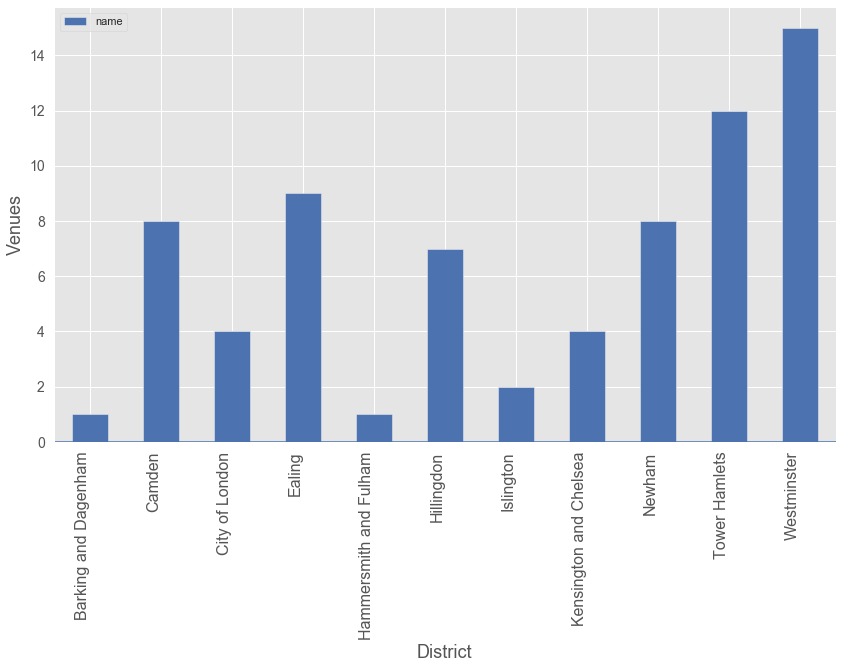

In [389]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

district_venues[['name']].plot(kind='bar',color='b')
plt.axhline(0, color='b')
plt.title=('Number of Venues per District')
plt.xlabel('District', fontsize=18)
plt.xticks(rotation=90, ha='right')
plt.ylabel('Venues',fontsize=18)

plt.show()

In [392]:
# Make a copy of nearby_venues which will be also used later for clustering
london_venues=nearby_venues.copy()
print(london_venues.shape)
london_venues.head()

(86, 6)


,name,categories,lat,lng,Average Income,Postcode
0,Gray's Inn Gardens,Garden,51.520335,-0.113891,48000,E3 4HU
1,Scarfes Bar,Hotel Bar,51.517813,-0.118184,44500,E1 3HZ
2,Rosewood London,Hotel,51.517468,-0.117810,65300,E1 1JQ
3,Catalyst Cafe,Coffee Shop,51.519705,-0.112052,47700,UB6 9BS
4,Cittie of Yorke,Pub,51.518620,-0.112599,47400,UB6 9AU


In [400]:
len(london_venues['Postcode'].unique().tolist())

84

#### Create a map of London Venues

In [402]:
# Create map of London using lat and lng values
map_WestLondon = folium.Map(location=[latitude_L, longitude_L], zoom_start=16)

# Add markers to map
for lat, lng, label in zip(london_venues['lat'], london_venues['lng'], london_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_WestLondon)  
    
map_WestLondon

### Postal Codes Clusters Analysis

### 1. Least Common Venues

In [394]:
# Display numbers of venues for each postcode
london_venues.groupby('Postcode').count()

,name,categories,lat,lng,Average Income
Postcode,,,,,
E1 1JQ,1,1,1,1,1
E1 3HZ,1,1,1,1,1
E1 4LJ,1,1,1,1,1
E1 4NA,1,1,1,1,1
E1 4QY,1,1,1,1,1
E1 4SE,1,1,1,1,1
E1 5LG,1,1,1,1,1
E1 7TE,1,1,1,1,1
E13 8EQ,1,1,1,1,1


In [395]:
print(london_venues.shape)
london_venues.head()

(86, 6)


,name,categories,lat,lng,Average Income,Postcode
0,Gray's Inn Gardens,Garden,51.520335,-0.113891,48000,E3 4HU
1,Scarfes Bar,Hotel Bar,51.517813,-0.118184,44500,E1 3HZ
2,Rosewood London,Hotel,51.517468,-0.117810,65300,E1 1JQ
3,Catalyst Cafe,Coffee Shop,51.519705,-0.112052,47700,UB6 9BS
4,Cittie of Yorke,Pub,51.518620,-0.112599,47400,UB6 9AU


#### One Hot Encoding 

In [396]:
# One Hot encoding of london_venues
london_onehot = pd.get_dummies(london_venues[['categories']], prefix="", prefix_sep="")

# Add Postcode column back to dataframe
london_onehot['Postcode'] = london_venues['Postcode'] 

# Move Postcode column to the first column
col_name="Postcode"
first_col = london_onehot.pop(col_name)
london_onehot.insert(0, col_name, first_col)

london_onehot.head()

,Postcode,Art Gallery,Arts & Crafts Store,Asian Restaurant,Bakery,Beer Bar,Bookstore,Bowling Alley,Burger Joint,Burrito Place,Café,Cheese Shop,Coffee Shop,Convention Center,Coworking Space,Creperie,Donut Shop,English Restaurant,Falafel Restaurant,Flea Market,Food Truck,French Restaurant,Garden,Grocery Store,Gym / Fitness Center,History Museum,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Plaza,Portuguese Restaurant,Pub,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Shoe Store,Sporting Goods Shop,Tapas Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar
0,E3 4HU,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,E1 3HZ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,E1 1JQ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,UB6 9BS,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,UB6 9AU,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [397]:
# Group onehot results by Postcode
london_grouped = london_onehot.groupby('Postcode').mean().reset_index()
london_grouped.head()

,Postcode,Art Gallery,Arts & Crafts Store,Asian Restaurant,Bakery,Beer Bar,Bookstore,Bowling Alley,Burger Joint,Burrito Place,Café,Cheese Shop,Coffee Shop,Convention Center,Coworking Space,Creperie,Donut Shop,English Restaurant,Falafel Restaurant,Flea Market,Food Truck,French Restaurant,Garden,Grocery Store,Gym / Fitness Center,History Museum,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Plaza,Portuguese Restaurant,Pub,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Shoe Store,Sporting Goods Shop,Tapas Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar
0,E1 1JQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,E1 3HZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,E1 4LJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,E1 4NA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,E1 4QY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Calculate frequency of venues based on their number per Postcode and display the 5 least common categories
num_bottom_venues = 5

for hood in london_grouped['Postcode']:
    print("----"+hood+"----")
    temp = london_grouped[london_grouped['Postcode'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=True).reset_index(drop=True).head(num_bottom_venues))
    print('\n')

----E11JQ----
                 venue  freq
0          Art Gallery   0.0
1            Hotel Bar   0.0
2   Italian Restaurant   0.0
3  Japanese Restaurant   0.0
4    Korean Restaurant   0.0


----E138EQ----
                 venue  freq
0          Art Gallery   0.0
1                Hotel   0.0
2            Hotel Bar   0.0
3   Italian Restaurant   0.0
4  Japanese Restaurant   0.0


----E13HZ----
                 venue  freq
0          Art Gallery   0.0
1                Hotel   0.0
2   Italian Restaurant   0.0
3  Japanese Restaurant   0.0
4    Korean Restaurant   0.0


----E146BJ----
                 venue  freq
0          Art Gallery   0.0
1            Hotel Bar   0.0
2   Italian Restaurant   0.0
3  Japanese Restaurant   0.0
4    Korean Restaurant   0.0


----E14LJ----
                 venue  freq
0          Art Gallery   0.0
1                Hotel   0.0
2            Hotel Bar   0.0
3   Italian Restaurant   0.0
4  Japanese Restaurant   0.0


----E14NA----
                 venue  freq
0    

                 venue  freq
0          Art Gallery   0.0
1            Hotel Bar   0.0
2   Italian Restaurant   0.0
3  Japanese Restaurant   0.0
4    Korean Restaurant   0.0


----W111DB----
                 venue  freq
0          Art Gallery   0.0
1                Hotel   0.0
2            Hotel Bar   0.0
3   Italian Restaurant   0.0
4  Japanese Restaurant   0.0


----W120NN----
                 venue  freq
0          Art Gallery   0.0
1                Hotel   0.0
2            Hotel Bar   0.0
3   Italian Restaurant   0.0
4  Japanese Restaurant   0.0


----W130JF----
                 venue  freq
0          Art Gallery   0.0
1                Hotel   0.0
2            Hotel Bar   0.0
3  Japanese Restaurant   0.0
4    Korean Restaurant   0.0


----W138AW----
                 venue  freq
0          Art Gallery   0.0
1            Hotel Bar   0.0
2   Italian Restaurant   0.0
3  Japanese Restaurant   0.0
4    Korean Restaurant   0.0


----W138BG----
                 venue  freq
0          Art G

In [21]:
# Define a function returning least common venues
def return_least_common_venues(row, num_bottom_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=True)
    
    return row_categories_sorted.index.values[0:num_bottom_venues]

The below DataFrame least_common_venues displays a ranking of the least common types of venues within the WC1R district of London.

In [22]:
# Create a DataFrame showing ranking venues categories based on frequency per postcode
num_bottom_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Postcode']
for ind in np.arange(num_bottom_venues):
    try:
        columns.append('{}{} Least Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Least Common Venue'.format(ind+1))

# create a new dataframe
least_common_venues = pd.DataFrame(columns=columns)
least_common_venues['Postcode'] = london_grouped['Postcode']

for ind in np.arange(london_grouped.shape[0]):
    least_common_venues.iloc[ind, 1:] = return_least_common_venues(london_grouped.iloc[ind, :], num_bottom_venues)

least_common_venues.head()

,Postcode,1st Least Common Venue,2nd Least Common Venue,3rd Least Common Venue,4th Least Common Venue,5th Least Common Venue,6th Least Common Venue,7th Least Common Venue,8th Least Common Venue,9th Least Common Venue,10th Least Common Venue
0,E11JQ,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park
1,E138EQ,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office
2,E13HZ,Art Gallery,Hotel,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park
3,E146BJ,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park
4,E14LJ,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office


In [23]:
least_common_venues.shape

(84, 11)

#### Clustering via kmeans

The below kmeans analysis is based on the information available on Foursquare about venues within the WC1R district of London.

In [24]:
# Use k-means to cluster the postcodes into 5 clusters
from sklearn.cluster import KMeans 

kclusters = 5

london_grouped_clustering = london_grouped.drop('Postcode', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ 

array([3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 3, 0, 0, 3,
       0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 3, 0, 4, 0, 2, 1, 1, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 4, 3, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 2, 0])

In [303]:
london_grouped_clustering.head()

,Art Gallery,Arts & Crafts Store,Asian Restaurant,Bakery,Beer Bar,Bookstore,Bowling Alley,Burger Joint,Burrito Place,Café,Cheese Shop,Coffee Shop,Convention Center,Coworking Space,Creperie,Donut Shop,English Restaurant,Falafel Restaurant,Flea Market,Food Truck,French Restaurant,Garden,Grocery Store,Gym / Fitness Center,History Museum,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Plaza,Portuguese Restaurant,Pub,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Shoe Store,Sporting Goods Shop,Tapas Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# add clustering labels
least_common_venues.insert(0, 'Cluster_Labels', kmeans.labels_)

In [26]:
print(least_common_venues.shape)
least_common_venues.head()

(84, 12)


,Cluster_Labels,Postcode,1st Least Common Venue,2nd Least Common Venue,3rd Least Common Venue,4th Least Common Venue,5th Least Common Venue,6th Least Common Venue,7th Least Common Venue,8th Least Common Venue,9th Least Common Venue,10th Least Common Venue
0,3,E11JQ,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park
1,0,E138EQ,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office
2,0,E13HZ,Art Gallery,Hotel,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park
3,0,E146BJ,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park
4,0,E14LJ,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office


In [27]:
least_common_venues.sort_values(by=['Postcode'])
least_common_venues.head()

,Cluster_Labels,Postcode,1st Least Common Venue,2nd Least Common Venue,3rd Least Common Venue,4th Least Common Venue,5th Least Common Venue,6th Least Common Venue,7th Least Common Venue,8th Least Common Venue,9th Least Common Venue,10th Least Common Venue
0,3,E11JQ,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park
1,0,E138EQ,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office
2,0,E13HZ,Art Gallery,Hotel,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park
3,0,E146BJ,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park
4,0,E14LJ,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office


In [28]:
# Let's view again london_venues
london_venues.sort_values(by=['Postcode'])
london_venues.head()

,name,categories,lat,lng,Average Income,Postcode
0,Gray's Inn Gardens,Garden,51.520335,-0.113891,48000,E34HU
1,Scarfes Bar,Hotel Bar,51.517813,-0.118184,44500,E13HZ
2,Rosewood London,Hotel,51.517468,-0.117810,65300,E11JQ
3,Catalyst Cafe,Coffee Shop,51.519705,-0.112052,47700,UB69BS
4,Cittie of Yorke,Pub,51.518620,-0.112599,47400,UB69AU


In [29]:
# Merge least_common_venues with london_venues to add details of income and cooredinates per postcode
least_common_venues = least_common_venues.join(london_venues.set_index('Postcode'), on='Postcode')

In [30]:
# Remove duplicate postcodes
least_common_venues.dropna(subset = ["Postcode"], inplace=True)
least_common_venues.drop_duplicates(subset ="Postcode", inplace = True)

In [429]:
# Display least_common_venues
print(least_common_venues.shape)
least_common_venues

(84, 17)


,Cluster_Labels,Postcode,1st Least Common Venue,2nd Least Common Venue,3rd Least Common Venue,4th Least Common Venue,5th Least Common Venue,6th Least Common Venue,7th Least Common Venue,8th Least Common Venue,9th Least Common Venue,10th Least Common Venue,name,categories,lat,lng,Average Income
0,3,E11JQ,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Rosewood London,Hotel,51.517468,-0.117810,65300
1,0,E138EQ,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Cigala,Tapas Restaurant,51.521883,-0.118401,40200
2,0,E13HZ,Art Gallery,Hotel,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Scarfes Bar,Hotel Bar,51.517813,-0.118184,44500
3,0,E146BJ,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Noble Rot,Wine Bar,51.521880,-0.118596,45000
4,0,E14LJ,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Anglo,Restaurant,51.520536,-0.109351,44500
5,0,E14NA,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,PureGym,Gym / Fitness Center,51.520671,-0.117736,44500
6,0,E14QY,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Mary Ward Centre Cafe,Café,51.521139,-0.121926,45700
7,0,E14SE,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Woolleys,Vegetarian / Vegan Restaurant,51.520326,-0.118002,45700
8,0,E15LG,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Alen's Fish & Chips,Seafood Restaurant,51.520210,-0.118347,53100
9,1,E161GW,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Press Coffee & Co.,Coffee Shop,51.515798,-0.111963,51800


In [424]:
italian=least_common_venues.loc[least_common_venues['3rd Least Common Venue'] == 'Italian Restaurant']
italian.shape

(52, 17)

Recomendation: Considering how popular and preferrred Italian restaurants are, this would be a good option if someone was looking to open a restaurant.

#### Create a map to visualize venues per clusters

In [430]:
# Import Matplotlib and associated plotting modules
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[latitude_L, longitude_L], zoom_start=16)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, code, cat, inc, cluster in zip(least_common_venues['lat'], least_common_venues['lng'], 
                                             least_common_venues['Postcode'], least_common_venues['4th Least Common Venue'], 
                                             least_common_venues['Average Income'], least_common_venues['Cluster_Labels']):
    label = folium.Popup(str(code) + '-' + str(cat) + '-' + ' Income ' 
                         + str(inc) + '-' + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Examine Clusters

In [55]:
# Cluster 0
least_common_venues_0 = least_common_venues[least_common_venues['Cluster_Labels']==0]
least_common_venues_0.reset_index(inplace=True)
least_common_venues_0 = least_common_venues_0.drop('index', 1)
print(least_common_venues_0.shape)
least_common_venues_0

(57, 17)


,Cluster_Labels,Postcode,1st Least Common Venue,2nd Least Common Venue,3rd Least Common Venue,4th Least Common Venue,5th Least Common Venue,6th Least Common Venue,7th Least Common Venue,8th Least Common Venue,9th Least Common Venue,10th Least Common Venue,name,categories,lat,lng,Average Income
0,0,E138EQ,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Cigala,Tapas Restaurant,51.521883,-0.118401,40200
1,0,E13HZ,Art Gallery,Hotel,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Scarfes Bar,Hotel Bar,51.517813,-0.118184,44500
2,0,E146BJ,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Noble Rot,Wine Bar,51.521880,-0.118596,45000
3,0,E14LJ,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Anglo,Restaurant,51.520536,-0.109351,44500
4,0,E14NA,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,PureGym,Gym / Fitness Center,51.520671,-0.117736,44500
5,0,E14QY,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Mary Ward Centre Cafe,Café,51.521139,-0.121926,45700
6,0,E14SE,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Woolleys,Vegetarian / Vegan Restaurant,51.520326,-0.118002,45700
7,0,E15LG,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Alen's Fish & Chips,Seafood Restaurant,51.520210,-0.118347,53100
8,0,E163PS,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Tutti's,Café,51.522379,-0.118833,41200
9,0,E164HH,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Krispy Kreme,Donut Shop,51.517542,-0.119765,40200


In [56]:
# Cluster 1
least_common_venues_1 = least_common_venues[least_common_venues['Cluster_Labels']==1]
least_common_venues_1.reset_index(inplace=True)
least_common_venues_1 = least_common_venues_1.drop('index', 1)
print(least_common_venues_1.shape)
least_common_venues_1

(12, 17)


,Cluster_Labels,Postcode,1st Least Common Venue,2nd Least Common Venue,3rd Least Common Venue,4th Least Common Venue,5th Least Common Venue,6th Least Common Venue,7th Least Common Venue,8th Least Common Venue,9th Least Common Venue,10th Least Common Venue,name,categories,lat,lng,Average Income
0,1,E161GW,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Press Coffee & Co.,Coffee Shop,51.515798,-0.111963,51800
1,1,E163ST,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Dartbrooke Coffee,Coffee Shop,51.518154,-0.108979,47400
2,1,E34HE,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Attendant,Coffee Shop,51.521294,-0.109850,51200
3,1,EC1Y8SE,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Knockbox Coffee,Coffee Shop,51.521305,-0.118167,48900
4,1,UB69BS,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Catalyst Cafe,Coffee Shop,51.519705,-0.112052,47700
5,1,UB78AN,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Redemption Roasters,Coffee Shop,51.522869,-0.119026,51700
6,1,W138AW,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,The Espresso Room,Coffee Shop,51.521910,-0.119775,59000
7,1,W138BG,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Prufrock Coffee,Coffee Shop,51.519926,-0.109453,59000
8,1,W1H6LP,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Half Million,Coffee Shop,51.517889,-0.120610,73500
9,1,W1P5GA,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,The Espresso Room,Coffee Shop,51.518399,-0.120824,46800


In [57]:
# Cluster 2
least_common_venues_2 = least_common_venues[least_common_venues['Cluster_Labels']==2]
least_common_venues_2.reset_index(inplace=True)
least_common_venues_2 = least_common_venues_2.drop('index', 1)
print(least_common_venues_2.shape)
least_common_venues_2

(8, 17)


,Cluster_Labels,Postcode,1st Least Common Venue,2nd Least Common Venue,3rd Least Common Venue,4th Least Common Venue,5th Least Common Venue,6th Least Common Venue,7th Least Common Venue,8th Least Common Venue,9th Least Common Venue,10th Least Common Venue,name,categories,lat,lng,Average Income
0,2,EC1N8PE,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,The Knights Templar (Wetherspoon),Pub,51.515274,-0.111850,50000
1,2,IG110JU,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,The Perseverance,Pub,51.522327,-0.118852,42500
2,2,UB69AU,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Cittie of Yorke,Pub,51.518620,-0.112599,47400
3,2,W111DB,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Holborn Whippet,Pub,51.518719,-0.121652,56500
4,2,W120NN,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,The Pregnant Man,Pub,51.516632,-0.112291,45900
5,2,WC1A 2QH,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Princess Louise,Pub,51.517470,-0.121621,56500
6,2,WC1N 3LT,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,George IV,Pub,51.514754,-0.116801,45700
7,2,WC2A 3JW,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Seven Stars,Pub,51.514973,-0.113451,65400


In [58]:
# Cluster 3
least_common_venues_3 = least_common_venues[least_common_venues['Cluster_Labels']==3]
least_common_venues_3.reset_index(inplace=True)
least_common_venues_3 = least_common_venues_3.drop('index', 1)
print(least_common_venues_3.shape)
least_common_venues_3

(5, 17)


,Cluster_Labels,Postcode,1st Least Common Venue,2nd Least Common Venue,3rd Least Common Venue,4th Least Common Venue,5th Least Common Venue,6th Least Common Venue,7th Least Common Venue,8th Least Common Venue,9th Least Common Venue,10th Least Common Venue,name,categories,lat,lng,Average Income
0,3,E11JQ,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Rosewood London,Hotel,51.517468,-0.117810,65300
1,3,E63SX,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,"Club Quarters Hotel, Lincoln's Inn Fields",Hotel,51.516055,-0.118590,43600
2,3,EC1M5US,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,L'Oscar,Hotel,51.517988,-0.120199,53800
3,3,UB32NX,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,The Hoxton Holborn,Hotel,51.517229,-0.122002,43800
4,3,W1U5AG,Art Gallery,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Saco,Hotel,51.522683,-0.118931,71200


In [59]:
# Cluster 4
least_common_venues_4 = least_common_venues[least_common_venues['Cluster_Labels']==4]
least_common_venues_4.reset_index(inplace=True)
least_common_venues_4 = least_common_venues_4.drop('index', 1)
print(least_common_venues_4.shape)
least_common_venues_4

(2, 17)


,Cluster_Labels,Postcode,1st Least Common Venue,2nd Least Common Venue,3rd Least Common Venue,4th Least Common Venue,5th Least Common Venue,6th Least Common Venue,7th Least Common Venue,8th Least Common Venue,9th Least Common Venue,10th Least Common Venue,name,categories,lat,lng,Average Income
0,4,UB49TZ,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Sicilian Avenue,Plaza,51.518648,-0.121188,53000
1,4,W1T6NU,Art Gallery,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Red Lion Square Gardens,Plaza,51.519262,-0.118854,46800


#### Plot cluster sizes

Use a bar chart compare clusters' size based on number of categories in each cluster

In [406]:
# Prepare a dataframe to plot based on london_grouped
london_grouped_sum=london_grouped.copy()
london_grouped_sum['Count'] = london_grouped_sum.sum(axis=1)
london_grouped_sum.head()

,Postcode,Art Gallery,Arts & Crafts Store,Asian Restaurant,Bakery,Beer Bar,Bookstore,Bowling Alley,Burger Joint,Burrito Place,Café,Cheese Shop,Coffee Shop,Convention Center,Coworking Space,Creperie,Donut Shop,English Restaurant,Falafel Restaurant,Flea Market,Food Truck,French Restaurant,Garden,Grocery Store,Gym / Fitness Center,History Museum,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Plaza,Portuguese Restaurant,Pub,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Shoe Store,Sporting Goods Shop,Tapas Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Count
0,E1 1JQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,E1 3HZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,E1 4LJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,E1 4NA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,E1 4QY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [407]:
# Add cluster labels
london_grouped_sum.insert(0, 'Cluster_Labels', kmeans.labels_)
print(london_grouped_sum.shape)
london_grouped_sum.head()

(84, 51)


,Cluster_Labels,Postcode,Art Gallery,Arts & Crafts Store,Asian Restaurant,Bakery,Beer Bar,Bookstore,Bowling Alley,Burger Joint,Burrito Place,Café,Cheese Shop,Coffee Shop,Convention Center,Coworking Space,Creperie,Donut Shop,English Restaurant,Falafel Restaurant,Flea Market,Food Truck,French Restaurant,Garden,Grocery Store,Gym / Fitness Center,History Museum,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Plaza,Portuguese Restaurant,Pub,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Shoe Store,Sporting Goods Shop,Tapas Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Count
0,3,E1 1JQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,E1 3HZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,E1 4LJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,E1 4NA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,E1 4QY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [408]:
clusters_bar=london_grouped_sum.groupby('Cluster_Labels').count()
clusters_bar

,Postcode,Art Gallery,Arts & Crafts Store,Asian Restaurant,Bakery,Beer Bar,Bookstore,Bowling Alley,Burger Joint,Burrito Place,Café,Cheese Shop,Coffee Shop,Convention Center,Coworking Space,Creperie,Donut Shop,English Restaurant,Falafel Restaurant,Flea Market,Food Truck,French Restaurant,Garden,Grocery Store,Gym / Fitness Center,History Museum,Hotel,Hotel Bar,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Lebanese Restaurant,Men's Store,Middle Eastern Restaurant,Office,Park,Plaza,Portuguese Restaurant,Pub,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Shoe Store,Sporting Goods Shop,Tapas Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Count
Cluster_Labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57
1,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
2,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
3,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


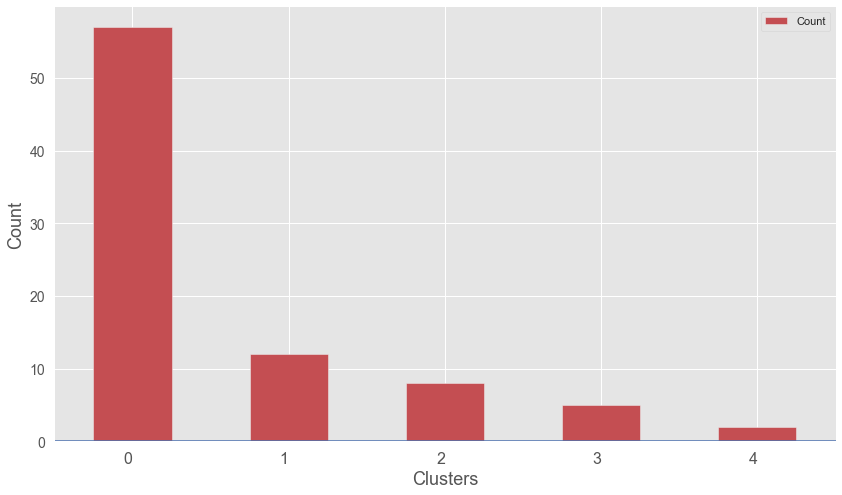

In [412]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

clusters_bar[['Count']].plot(kind='bar',color='r')
plt.axhline(0, color='b')
plt.title=('Number of Postcodes per Cluster')
plt.xlabel('Clusters', fontsize=18)
plt.xticks(rotation=0, ha='right')
plt.ylabel('Count',fontsize=18)

plt.show()

The bar chart shows how large Cluster 0 is compared to the others.

### 2. Most Common Venues

Let's see what are the most commont venue categories for each cluster.

Prepare the data

In [442]:
# Define a function returning most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

# Create a DataFrame showing ranking venues categories based on frequency per postcode
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Postcode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
most_common_venues = pd.DataFrame(columns=columns)
most_common_venues['Postcode'] = london_grouped['Postcode']

for ind in np.arange(london_grouped.shape[0]):
    most_common_venues.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

most_common_venues.head()


# Use k-means to cluster the postcodes into 5 clusters
from sklearn.cluster import KMeans 

kclusters = 5

london_grouped_clustering = london_grouped.drop('Postcode', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_


# add clustering labels
most_common_venues.insert(0, 'Cluster_Labels', kmeans.labels_)


print(most_common_venues.shape)
most_common_venues.head()

(84, 12)


,Cluster_Labels,Postcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,4,E1 1JQ,Hotel,Wine Bar,Grocery Store,French Restaurant,Food Truck,Flea Market,Falafel Restaurant,English Restaurant,Donut Shop,Creperie
1,0,E1 3HZ,Hotel Bar,Wine Bar,Grocery Store,French Restaurant,Food Truck,Flea Market,Falafel Restaurant,English Restaurant,Donut Shop,Creperie
2,0,E1 4LJ,Restaurant,Wine Bar,Coffee Shop,French Restaurant,Food Truck,Flea Market,Falafel Restaurant,English Restaurant,Donut Shop,Creperie
3,0,E1 4NA,Gym / Fitness Center,Vietnamese Restaurant,Garden,French Restaurant,Food Truck,Flea Market,Falafel Restaurant,English Restaurant,Donut Shop,Creperie
4,0,E1 4QY,Café,Wine Bar,Convention Center,Garden,French Restaurant,Food Truck,Flea Market,Falafel Restaurant,English Restaurant,Donut Shop


In [443]:
# Extract only necessary columns
most_common_bar=most_common_venues[['Cluster_Labels','1st Most Common Venue']].copy()
print(most_common_bar.shape)
most_common_bar.head()

(84, 2)


,Cluster_Labels,1st Most Common Venue
0,4,Hotel
1,0,Hotel Bar
2,0,Restaurant
3,0,Gym / Fitness Center
4,0,Café


In [447]:
# Group the dataframe and add a column with count of each category per cluster
most_common_grouped=most_common_bar.groupby(['Cluster_Labels','1st Most Common Venue'])['1st Most Common Venue'].agg('count').to_frame('Count').reset_index()
most_common_grouped=most_common_grouped.sort_values(by=['Cluster_Labels','Count'])
most_common_grouped.reset_index(inplace=True)
most_common_grouped = most_common_grouped.drop('index', 1)
print(most_common_grouped.shape)
most_common_grouped

(47, 3)


,Cluster_Labels,1st Most Common Venue,Count
0,0,Art Gallery,1
1,0,Arts & Crafts Store,1
2,0,Asian Restaurant,1
3,0,Beer Bar,1
4,0,Bowling Alley,1
5,0,Burrito Place,1
6,0,Cheese Shop,1
7,0,Convention Center,1
8,0,Coworking Space,1
9,0,Creperie,1


In [449]:
# Leave on the categories with largest number of venues per cluster
most_common_grouped = most_common_grouped.drop(most_common_grouped.index[0:40])
most_common_grouped.reset_index(inplace=True)
most_common_grouped = most_common_grouped.drop('index', 1)
most_common_grouped

,Cluster_Labels,1st Most Common Venue,Count
0,0,Plaza,2
1,0,Restaurant,2
2,0,Gym / Fitness Center,3
3,1,Coffee Shop,12
4,2,Pub,8
5,3,Bakery,2
6,4,Hotel,5


Visualize the number of venues of each category for every cluster

[Text(0, 0.5, 'Number of Categories'),
 Text(0.5, 0, 'Clusters'),
 Text(0.5, 1.0, 'Most Common Venue Categories')]

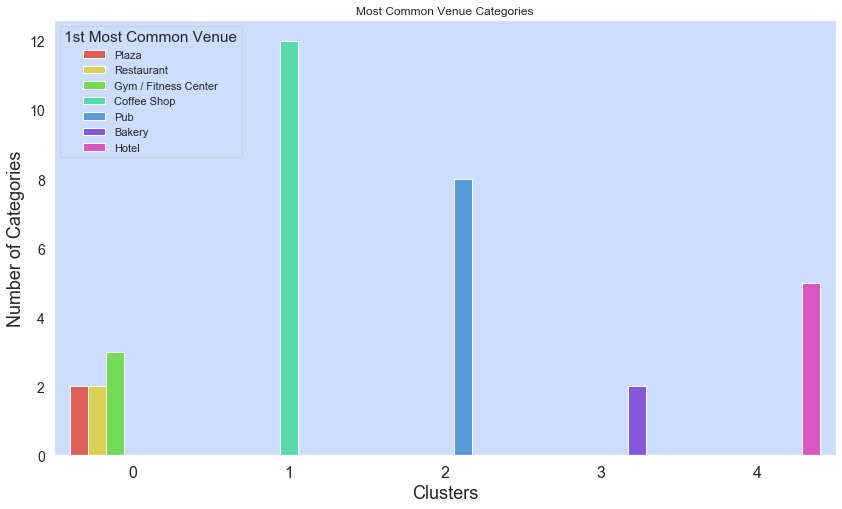

In [450]:
import seaborn as sns

ax=sns.barplot(x='Cluster_Labels', y='Count', hue='1st Most Common Venue', data=most_common_grouped, 
            palette = 'hls',            
            capsize = 0.1,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 1,  
            ci = 'sd')
ax.set(xlabel='Clusters', ylabel='Number of Categories', title='Most Common Venue Categories')


### Average Income in various London Districts

This part of project aims to provide information about the average income in various London Districts. If an entrepreneur was looking to set up a business in London, they would find such information about the local population a good guide in choosing a location.

#### Data preparation

Extract the columns to work with from df_all_Lnd

In [276]:
districts=df_all_Lnd[['District','Postcode district','Average Income']].copy()
print(districts.shape)
districts.head()

(321834, 3)


,District,Postcode district,Average Income
0,Bromley,BR1,63100
1,Bromley,BR1,56100
2,Bromley,BR1,63100
3,Bromley,BR1,63100
4,Bromley,BR1,63100


In [277]:
postcodes_list=df_all_Lnd['Postcode district'].unique().tolist()
len(postcodes_list)

329

From geolocator, extract the coordinates for the London Districts

In [278]:
!pip install geopy
from geopy.geocoders import Nominatim 
geolocator = Nominatim(user_agent="ny_explorer")

import time

postcodes_valid=[]
latitude_list=[]
longitude_list=[]

# Due to the calls per second restricions of geolocator, split postcodes_list into 22 batches

batches=np.array_split(postcodes_list, 22)

for batch in batches:
    batch=batch.tolist()

    for postcode in batch:
        
        location = geolocator.geocode(str(postcode)+' London UK')
        if location:
            latitude_district = location.latitude
            longitude_district = location.longitude
            latitude_list.append(latitude_district)
            longitude_list.append(longitude_district)
            postcodes_valid.append(postcode)
    time.sleep(2)  # set up pause between loop iterations to work around calls per second restricions of geolocator
    
print(latitude_list)
print(longitude_list)

[51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.8980102, 51.3713618, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.38249, 51.5073219, 51.5073219, 51.4520413, 51.50355365, 51.4935969, 51.5073219, 51.45390140000001, 51.460448, 51.46913725, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.50523985, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5073219, 51.5245097, 51.52094675732767, 51.5215089, 51.5252827, 51.5243996, 51.5235355, 51.522038550000005, 51.51820305, 51.514093, 51.5140873, 51.5187193, 51.5105477, 51.5114768, 51.5121763, 51.5142684, 51.513859, 51.510346049999995, 51.510667, 51.5119965, 51.5141588, 51.5073219, 51.644995155555556, 51.6605624, 51.667345350000005, 51.671485, 51.64341765, 51.649671100000006, 51.68064685, 51.6818907

In [279]:
print(len(postcodes_valid))
print(len(latitude_list))
print(len(longitude_list))

285
285
285


Prepare a dataframe containing details of district postcodes, coordinates and average income

In [280]:
d = {'Postcode district':postcodes_valid,'Latitude_district':latitude_list,'Longitude_district':longitude_list}
districts_coords = pd.DataFrame(d)
print(districts_coords.shape)
districts_coords.head()

(285, 3)


,Postcode district,Latitude_district,Longitude_district
0,BR1,51.507322,-0.127647
1,BR2,51.507322,-0.127647
2,BR3,51.507322,-0.127647
3,BR4,51.507322,-0.127647
4,BR5,51.507322,-0.127647


In [281]:
print(districts.shape)
districts.head()

(321834, 3)


,District,Postcode district,Average Income
0,Bromley,BR1,63100
1,Bromley,BR1,56100
2,Bromley,BR1,63100
3,Bromley,BR1,63100
4,Bromley,BR1,63100


In [282]:
districts_unique=districts.copy()
districts_unique.drop_duplicates(subset ="District", inplace = True)
districts_unique.reset_index(inplace=True)
districts_unique = districts_unique.drop('index', 1)
print(districts_unique.shape)
districts_unique.head()

(33, 3)


,District,Postcode district,Average Income
0,Bromley,BR1,63100
1,Lewisham,BR1,42900
2,Lambeth,BR1,57700
3,Croydon,BR3,52300
4,Greenwich,BR7,52100


In [283]:
districts_grouped=districts.groupby(['District','Postcode district'],as_index=False).mean().round(0)
print(districts_grouped.shape)
districts_grouped.head()

(648, 3)


,District,Postcode district,Average Income
0,Barking and Dagenham,IG11,44668.0
1,Barking and Dagenham,RM1,47800.0
2,Barking and Dagenham,RM10,40181.0
3,Barking and Dagenham,RM12,43700.0
4,Barking and Dagenham,RM5,39000.0


Here is the final dataframe districts_data which will be used for visalization

In [284]:
districts_data=pd.merge(districts_unique, districts_coords, on='Postcode district')
districts_data=districts_data.dropna()
districts_data.drop_duplicates(subset ="Postcode district", inplace = True)
print(districts_data.shape)
districts_data.head()

(24, 5)


,District,Postcode district,Average Income,Latitude_district,Longitude_district
0,Bromley,BR1,63100,51.507322,-0.127647
3,Croydon,BR3,52300,51.507322,-0.127647
4,Greenwich,BR7,52100,51.507322,-0.127647
5,Camden,CM23,42300,51.898010,0.171758
6,Sutton,CR0,57200,51.371362,-0.111124


#### Cluster London Districts by Average Income

Cluster teh dictrict by average income to define groups of locations with highest income.

In [285]:
# Use k-means to cluster districts into 4 clusters
from sklearn.cluster import KMeans 

districts_cluster = districts_data.drop(['District','Postcode district','Latitude_district','Longitude_district'],1)

# Run k-means clustering
kmeans2 = KMeans(n_clusters=3, random_state=0).fit(districts_cluster)

# Check cluster labels generated for each row in the dataframe
kmeans2.labels_[0:10]

array([0, 1, 1, 2, 1, 1, 2, 2, 1, 2])

In [286]:
# Add Cluster labels
districts_data.insert(0, 'Cluster_district', kmeans2.labels_)

In [287]:
districts_data.reset_index(inplace=True)
districts_data = districts_data.drop('index', 1)

In [288]:
print(districts_data.shape)
districts_data.head()

(24, 6)


,Cluster_district,District,Postcode district,Average Income,Latitude_district,Longitude_district
0,0,Bromley,BR1,63100,51.507322,-0.127647
1,1,Croydon,BR3,52300,51.507322,-0.127647
2,1,Greenwich,BR7,52100,51.507322,-0.127647
3,2,Camden,CM23,42300,51.898010,0.171758
4,1,Sutton,CR0,57200,51.371362,-0.111124


#### Create map visualizing venues' post codes, categories and avegare income in that area

In [451]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

# define map
map_districts = folium.Map(location=[latitude_L, longitude_L], zoom_start=11)

# add markers to the map
for lat, lon, dis, inc, cluster in zip(districts_data['Latitude_district'], districts_data['Longitude_district'], districts_data['District'], districts_data['Average Income'], districts_data['Cluster_district']):
    label = folium.Popup(str(dis) + ' Cluster-' + str(cluster) + " " + 'Income-' + str(inc), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_districts)
       
map_districts

#### Examine Clusters

In [431]:
# Cluster 0
districts_data_0 = districts_data[districts_data['Cluster_district']==0]
districts_data_0.sort_values(by=['Average Income'], inplace=True)
districts_data_0.reset_index(inplace=True)
districts_data_0 = districts_data_0.drop('index', 1)
print(districts_data_0.shape)
districts_data_0

(6, 6)


C:\Users\50036268\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Cluster_district,District,Postcode district,Average Income,Latitude_district,Longitude_district
0,0,Westminster,EC4A,59000,51.514268,-0.106550
1,0,Haringey,N10,60100,51.507322,-0.127647
2,0,Barnet,EN4,61700,51.671485,-0.161161
3,0,Bromley,BR1,63100,51.507322,-0.127647
4,0,Kingston upon Thames,KT1,63900,51.414529,-0.312884
5,0,Wandsworth,SW11,73000,51.464109,-0.161146


In [432]:
# Cluster 1
districts_data_1 = districts_data[districts_data['Cluster_district']==1]
districts_data_1.sort_values(by=['Average Income'], inplace=True)
districts_data_1.reset_index(inplace=True)
districts_data_1 = districts_data_1.drop('index', 1)
print(districts_data_1.shape)
districts_data_1

(11, 6)


C:\Users\50036268\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Cluster_district,District,Postcode district,Average Income,Latitude_district,Longitude_district
0,1,Southwark,SE1,48300,51.496646,-0.099582
1,1,Merton,CR4,48500,51.507322,-0.127647
2,1,Islington,E8,49000,51.507322,-0.127647
3,1,Brent,HA0,51400,51.549169,-0.302408
4,1,Greenwich,BR7,52100,51.507322,-0.127647
5,1,Croydon,BR3,52300,51.507322,-0.127647
6,1,Hounslow,SW13,53100,51.507322,-0.127647
7,1,Harrow,HA1,53600,51.507322,-0.127647
8,1,Redbridge,E11,55000,51.507322,-0.127647
9,1,Hillingdon,HA2,56600,51.566642,-0.363995


In [433]:
# Cluster 2
districts_data_2 = districts_data[districts_data['Cluster_district']==2]
districts_data_2.sort_values(by=['Average Income'], inplace=True)
districts_data_2.reset_index(inplace=True)
districts_data_2 = districts_data_2.drop('index', 1)
print(districts_data_2.shape)
districts_data_2

(7, 6)


C:\Users\50036268\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Cluster_district,District,Postcode district,Average Income,Latitude_district,Longitude_district
0,2,Enfield,E4,38700,51.507322,-0.127647
1,2,Camden,CM23,42300,51.898010,0.171758
2,2,Barking and Dagenham,IG11,42300,51.539568,0.067432
3,2,Waltham Forest,E10,42500,51.507322,-0.127647
4,2,Tower Hamlets,E1,43200,51.507322,-0.127647
5,2,Kensington and Chelsea,SW10,44600,51.507322,-0.127647
6,2,Hammersmith and Fulham,NW10,45900,51.534621,-0.258584


Cluster 1 contains dictricts with the highest average income.

#### Box Plot visualization of the Clusters

The below box plots show how the average income ranges compere accross the three clusters.

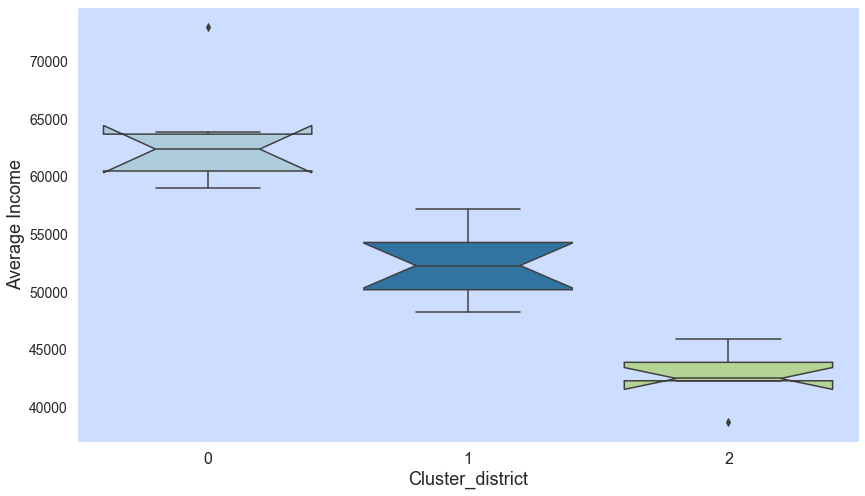

In [434]:
import seaborn as sns

sns.set(rc={"axes.facecolor":"#ccddff",
            "axes.grid":False,
            'axes.labelsize':18,
            'figure.figsize':(14.0, 8.0),
            'xtick.labelsize':16,
            'ytick.labelsize':14})


p = sns.boxplot(data=districts_data,
                x = 'Cluster_district',
                y = 'Average Income',
                palette = 'Paired',
                notch=True)